# 

# Import Libraries

In [10]:
import re
import nltk.corpus
import csv
import pandas as pd
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
plt.style.use('seaborn')

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# read CSV file
csv_data = pd.read_csv("merged_file.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/atiemohammadesmaeili/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/atiemohammadesmaeili/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/atiemohammadesmaeili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/atiemohammadesmaeili/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/atiemohammadesmaeili/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Increased Readability 

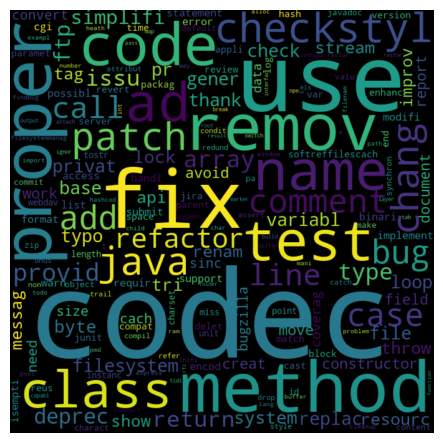

In [7]:

#increased readability
csv_data = csv_data[csv_data["goal"] == 1]

# extract commit messages
commit_msgs = csv_data["commit_msg"].tolist()

# join all commit messages into a single string
text = ' '.join(commit_msgs)

# text cleaning
#Normalizing Text
text = text.lower()

#Removing Unicode Characters
#text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
text = re.sub(r"(@\[A-Za-z0-9]|^rt|http.+?)|(git-svn-id)|(://svn.apache.org/repos/asf/jakarta)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
text = ''.join(i for i in text if not i.isdigit())

p = [
    "ffaedef", "sandbox", "trunk", "license" , 
    "bcel" , "vfs" , "apache" , "contact" ,"f",
    "address" , "uri", "fileobject" , "file" , 
    "copyright", "defaultfilename" , "test" , "svn","asf","repos","javadoc","v","org","bb"
]

text = list(filter(lambda x: x not in p, text.split()))
text = " ".join(text)

#Removing Stopwords
stop_words = set(stopwords.words('english'))
text_tokens = nltk.word_tokenize(text)
text = ' '.join([word for word in text_tokens if not word in stop_words])

# lemmatization
lemmatizer = WordNetLemmatizer()
text_tokens = nltk.word_tokenize(text)
text = ' '.join([lemmatizer.lemmatize(word) for word in text_tokens])

# stemming
stemmer = PorterStemmer()
text_tokens = nltk.word_tokenize(text)
text = ' '.join([stemmer.stem(word) for word in text_tokens])

# part of speech (POS) tagging
text_tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(text_tokens)
text = ' '.join([word[0] for word in pos_tags if word[1].startswith('N')])


# create word cloud
wordcloud = WordCloud(collocations=False,width=680, height=680, margin=0).generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# 10 frequent words for increasing readability

<AxesSubplot:xlabel='incread_Readability'>

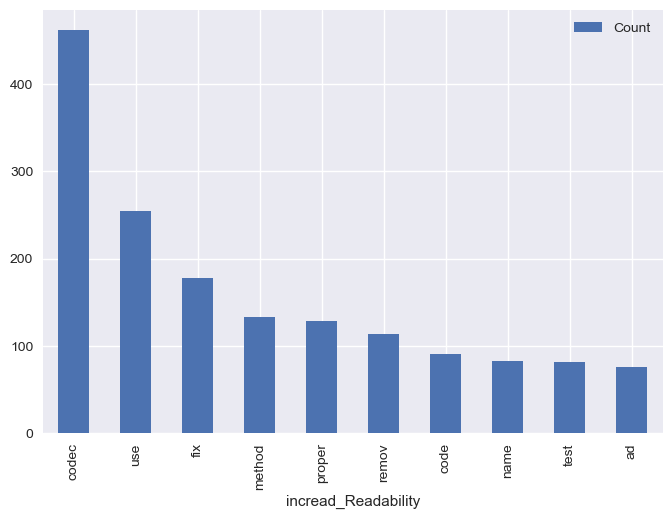

In [8]:
# split() returns list of all the words in the string
split_it = text.split()
Counters_found = Counter(split_it)
most_occur = Counters_found.most_common(10)
df = pd.DataFrame(most_occur,columns = ['incread_Readability', 'Count'])
df.plot.bar(x='incread_Readability',y='Count')

# Decreased Readability 

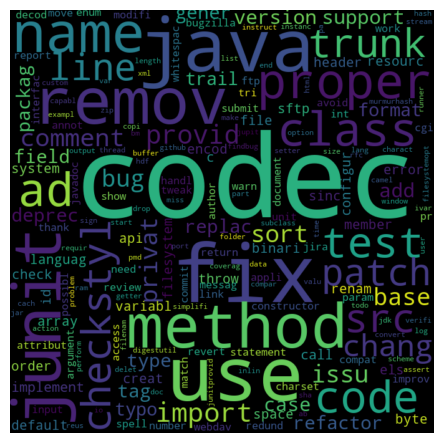

In [11]:

#decreased readability
csv_data_1 = csv_data[csv_data["goal"] == 0]

# extract commit messages
commit_msgs = csv_data_1["commit_msg"].tolist()

# join all commit messages into a single string
text = ' '.join(commit_msgs)

# text cleaning
#Normalizing Text
text = text.lower()

#Removing Unicode Characters
#text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
text = re.sub(r"(@\[A-Za-z0-9]|^rt|http.+?)|(git-svn-id)|(://svn.apache.org/repos/asf/jakarta)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
text = ''.join(i for i in text if not i.isdigit())

p = [
    "ffaedef", "sandbox", "trunk", "license" , 
    "bcel" , "vfs" , "apache" ,"contact" ,"f",
    "address" ,"uri", "fileobject" , "file" , 
    "copyright", "defaultfilename" , "test" , "commons", "svn","asf","repos","javadoc","v","org","bb"
]

text = list(filter(lambda x: x not in p, text.split()))
text = " ".join(text)

#Removing Stopwords
stop_words = set(stopwords.words('english'))
text_tokens = nltk.word_tokenize(text)
text = ' '.join([word for word in text_tokens if not word in stop_words])

# lemmatization
lemmatizer = WordNetLemmatizer()
text_tokens = nltk.word_tokenize(text)
text = ' '.join([lemmatizer.lemmatize(word) for word in text_tokens])

# stemming
stemmer = PorterStemmer()
text_tokens = nltk.word_tokenize(text)
text = ' '.join([stemmer.stem(word) for word in text_tokens])

# part of speech (POS) tagging
text_tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(text_tokens)
text = ' '.join([word[0] for word in pos_tags if word[1].startswith('N')])


# create word cloud
wordcloud = WordCloud(collocations=False,width=680, height=680, margin=0).generate(text)

# plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



# 10 frequent words for decreasing readability

<AxesSubplot:xlabel='Decread_Readability'>

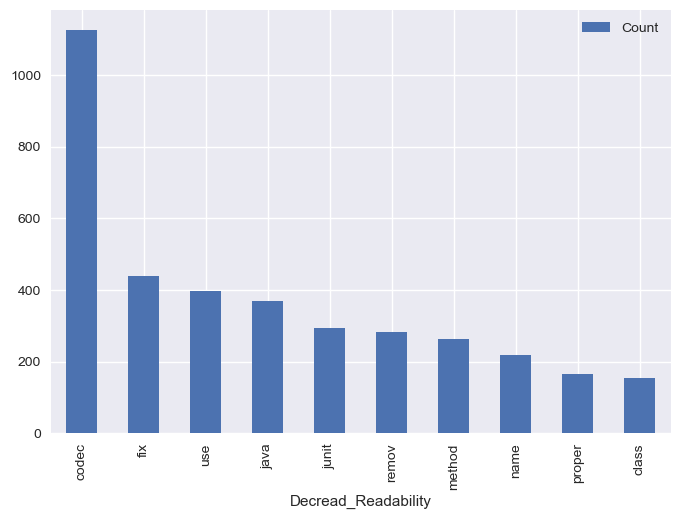

In [12]:
# split() returns list of all the words in the string
split_it = text.split()
Counters_found = Counter(split_it)
most_occur = Counters_found.most_common(10)
df = pd.DataFrame(most_occur,columns = ['Decread_Readability', 'Count'])
df.plot.bar(x='Decread_Readability',y='Count')
